# Model Development on a Used Cars Pricing Dataset

## Set Up

In [ ]:
# install libs
%pip install pandas numpy micropip scikit-learn

In [5]:
# import libs
import pandas as pd
import numpy as np
import micropip
await micropip.install("seaborn")
import matplotlib.pyplot as plt

## Utils

In [6]:
import requests as re

def download(url, filename):
    response = re.get(url)
    if response.status_code == 200:
        with open(filename, "w") as f:
            f.write(response.text)

## Data Import

In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
file_name = "datasets/raw/auto_model.csv"
download(url, file_name)

# read csv
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Models to Develop
- **Simple Linear Regression**: model to understand the relationship between two variables
$$
    Yhat = intercept + slope  X
$$
- **Multiple Linear Regression**: model to explain the relationship between one continuous dependent variable and two or more predictors
$$
    Yhat = a + b_1 X_1 + b_2 Xx_2 + ...
$$
- **Polynomial Regression**: Particular case of the general linear regression model. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
    - Quadratic - 2nd order $$ Yhat = a + b_1 X + b_2 X^2$$
    - Cubic - 3rd Order $$ Yhat = a + b_1 X + b_2 X^2 + b_3 X^3 $$
    - High Order $$ Yhat = a + b_1 X + b_2 X^2 + b_3 X^3 + b_4 X^4 + ...$$

- **Multiple Polynomial Regression**: Polynomial regression with more than one predictor variable.
    - i.e Quadratic - 2nd order $$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2$$

## Model Evaluation
- Using visualization
    - **Regression plot:** Visualize an estimate of the relationship between two variables, the strength of correlation, as well as the direction.
    - **Residual Plot:**  Visualize the variance of the data. The residual is the difference between the observed valued and the predicted. We have to look at the spreed of the residuals. If the points are randomly spread out around the x-axis(the variance is constant), then a linear model is appropriate for the data
    - **Distribution Plot:** Visualize the fit of the model. We can look the distribution of the fitted values and compare it to the actual values.
- Using measures?
    - **MSE - Mean Squared Error:** measures the average of the squares of errors(difference between the actual value and the estimated).
        - the model with the smallest MSE value is a better fit for the data.
    - **R2 - R squared or coefficient of determination:**  measure that indicate how close the data is to the fitted regression line. The value of the coefficient of determination is the percentage of variation of the response variable that is explained by a linear model
        - the model with the higher R-squared value is a better fit for the data.

## Linear Regression Model

In [8]:
# import lib
from sklearn.linear_model import LinearRegression

# instance linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [9]:
# How could "engine-size" help us predict car price?
## Independent Variable
X = df[["engine-size"]]
## Dependent Variable
Y = df[["price"]]

## fit the linear model
lm.fit(X,Y)

## test prediction
Yhat = lm.predict(X)
print("predicted values:", Yhat[0:5])

print(f"the intercept is {lm.intercept_} and the slope is {lm.coef_}")

predicted values: [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]
the intercept is [-7963.33890628] and the slope is [[166.86001569]]


$$
    Yhat = -7963.34 + 166.86 X
$$

## Multiple Linear Regression

In [10]:
# How could "normalized-losses" and "highway-mpg" help us predict car price?
## Independent Variable
X = df[["normalized-losses", "highway-mpg"]]
## Dependent Variable
Y = df[["price"]]

# fit the linear model
lm2 = LinearRegression()
lm2.fit(X, Y)

#test prediction
Yhat = lm2.predict(X)
print("predicted values:", Yhat[0:5])

print(f"the intercept is {lm2.intercept_} and the coefficients are {lm2.coef_}")

predicted values: [[16231.78938339]
 [16231.78938339]
 [17052.24372355]
 [13833.33798916]
 [20396.97271047]]
the intercept is [38201.31327246] and the coefficients are [[   1.49789586 -820.45434016]]


$$
    Price = 38201.31 + 1.50 * NormalizedLosses - 820.45 * highwayMpg
$$

In [11]:
# How could "horsepower", "curb-weight", "engine-size" and "highway-mpg" help us predict car price?
## Independent Variable
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
## Dependent Variable
Y = df[["price"]]

# fit the linear model
lm3 = LinearRegression()
lm3.fit(Z, Y)

#test prediction
Yhat = lm3.predict(Z)
print("predicted values:", Yhat[0:5])

print(f"the intercept is {lm3.intercept_} and the coefficients are {lm3.coef_}")

predicted values: [[13699.11161184]
 [13699.11161184]
 [19051.65470233]
 [10620.36193015]
 [15521.31420211]]
the intercept is [-15806.62462633] and the coefficients are [[53.49574423  4.70770099 81.53026382 36.05748882]]


$$
    Price = -15806.63 + 53.50 * horsepower + 4.71 * curbWeight 
    + 81.53 * engineSize + 36.06 * highwayMpg
$$

## Model Evaluation using Visualization

In [12]:
import seaborn as sns
%matplotlib inline

### Regression plot

(0.0, 47414.1)

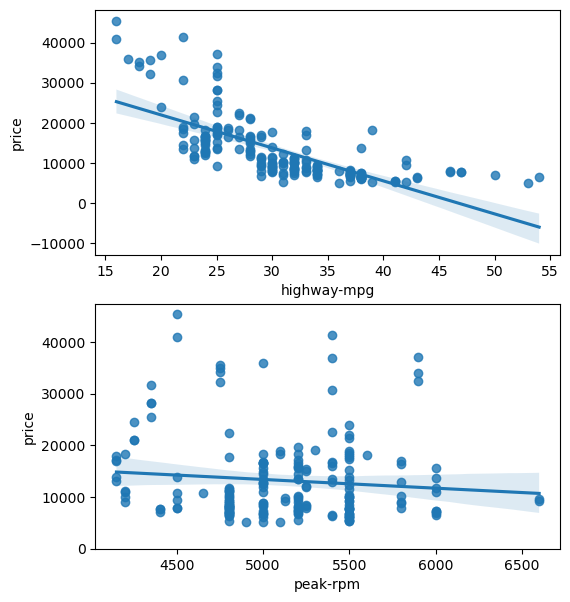

In [13]:
# set the size of the plot
width = 6
height = 7
f, axes = plt.subplots(2, 1, figsize=(width, height))
# regression plot in highway-mpg vs price
sns.regplot(x="highway-mpg", y="price", data=df, ax=axes[0])
# we can see that price is negatively correlated to highway-mpg

# regression plot in peak-rpm vs price
sns.regplot(x="peak-rpm", y="price", data=df, ax=axes[1])
plt.ylim(0,)
# we can't see if is positive or negative correlation, 
# and the points have more spread around the predicted line

# Visually, we can assume that peak-rpm is not a good a predictor and is not correlated
# We need to see for the pearson coefficient value to validate our statement


In [14]:
df[["highway-mpg", "peak-rpm", "price"]].corr()
# the pearson coefficient for peak-rpm with price is -0.1, is too close to 0 
# and this proves that is not a good predictor

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


### Residual plot

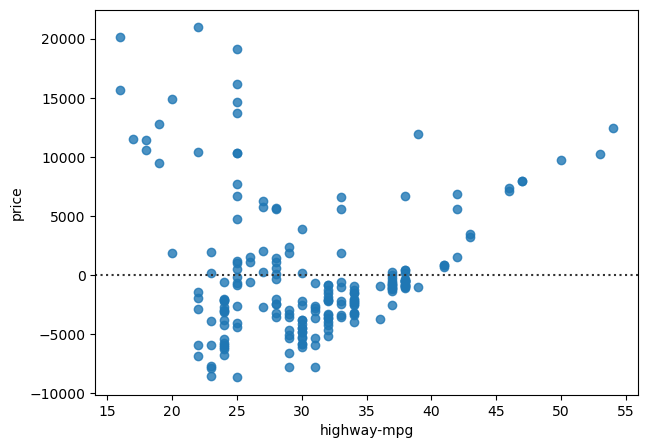

In [15]:
# Continue with a residual plot of "highway-mpg"
plt.figure(figsize=(7,5))
sns.residplot(x=df["highway-mpg"], y=df["price"])
plt.show()

# we can see the residuals are not randomly spread around the x-axis, so this means 
# a linear model is not appropriate

### Distribution plot

In [16]:
# lets recover the model of multiple linear regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm3.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

$$
    Price = -15806.63 + 53.50 * horsepower + 4.71 * curbWeight 
    + 81.53 * engineSize + 36.06 * highwayMpg
$$

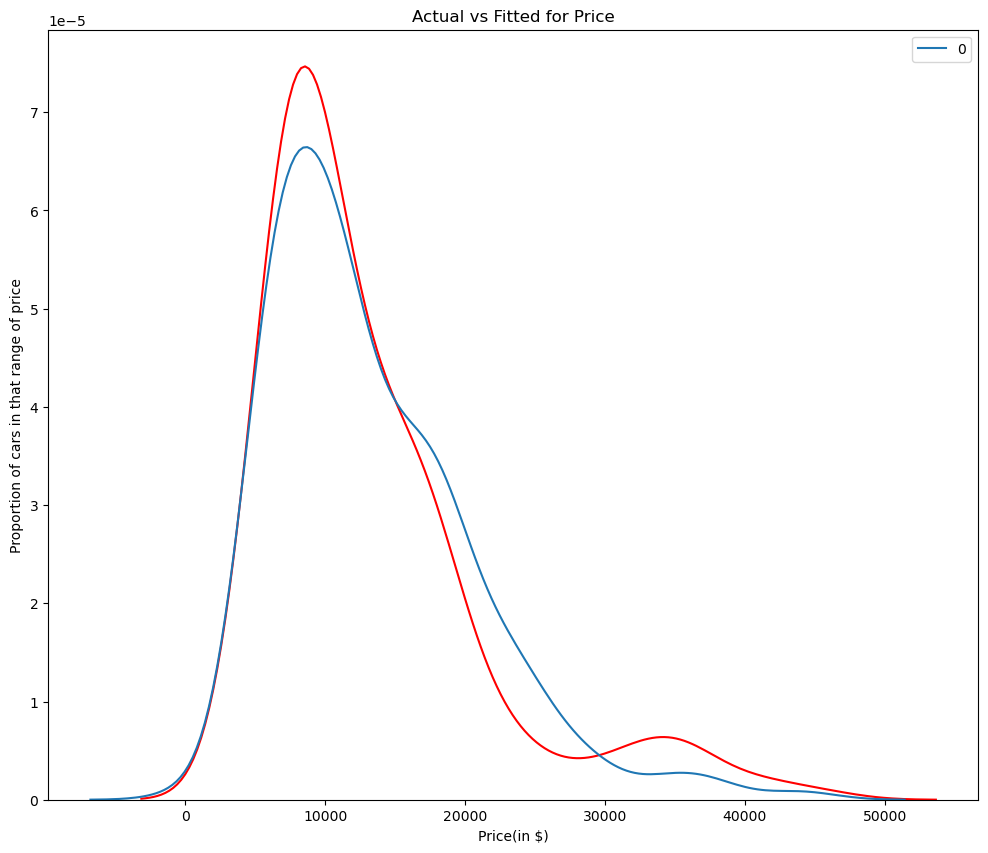

In [17]:
Y_hat = lm3.predict(Z)

plt.figure(figsize=(12,10))

# change from displot with hist=False to histplot, kdeplot and ecdfplot
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value") 
sns.kdeplot(Y_hat, color="b", label="Fitted values", ax=ax1)

plt.title("Actual vs Fitted for Price")
plt.xlabel("Price(in $)")
plt.ylabel("Proportion of cars in that range of price")

plt.show()
plt.close()

# We can see that the fitted values are close to the actual values. 
# However, there is some room for improvement

## Polynomial Regression

In [18]:
# a plot function
def PlotPolly(model, independent_var, dependent_var, Name):
    x_new = np.linspace(15,55,100) # generate values to test the model
    y_new = model(x_new)

    # plot the actual data with dots
    # plot the polynomial regression curve as a line
    plt.plot(independent_var, dependent_var, ".", x_new, y_new, "-")

    plt.title("Polynomial fit for price")
    ax = plt.gca() # get the current axes instance
    ax.set_facecolor((0.898, 0.898, 0.898)) # set gray
    fig = plt.gcf() # get the current figure
    plt.xlabel(Name)
    plt.ylabel("Price")

    plt.show()
    plt.close()

In [19]:
# we see in the distribution plot of highway-mpg vs price, that a linear model is not the best option
# so let's build a polynomial model of one independent variable
X = df["highway-mpg"]
Y = df["price"]

# using numpy
f = np.polyfit(X,Y,3) # Cubic - 3rd Order
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


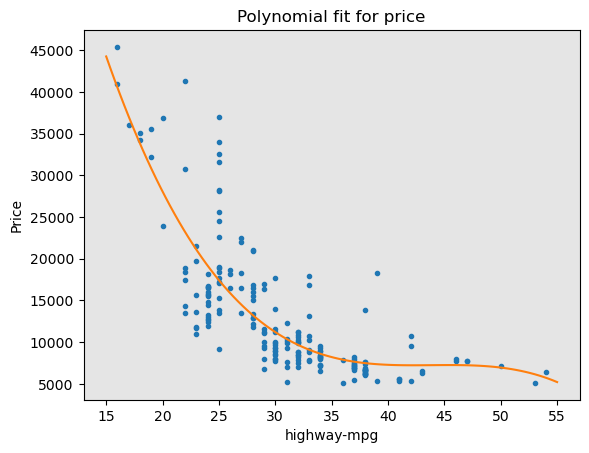

In [20]:
PlotPolly(p, X, Y, "highway-mpg")
# We can see that this polynomial model performs better than lineal model

$$
    Y = -1.557 x^3 + 204.75 x^2 - 8965.4x + 137923.6
$$

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


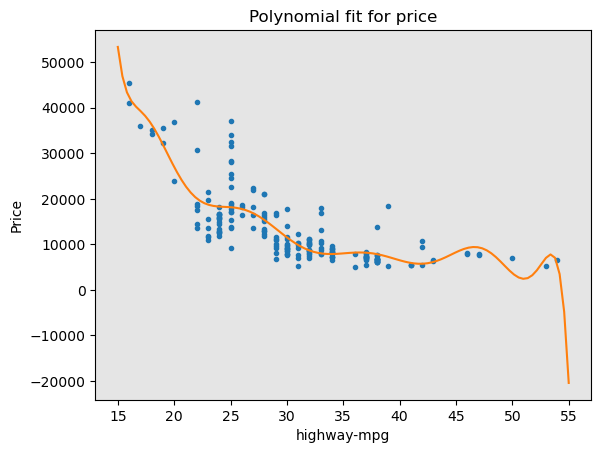

In [21]:
# lets try to build a polynomial model of 11th order
f1 = np.polyfit(X,Y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, X, Y, "highway-mpg")

# appears to to be an overfitting

## Multiple Polynomial Regression

### Polynomial Features Transformation

In [22]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [23]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr = pr.fit_transform(Z)

In [24]:
Z.shape

(201, 4)

In [25]:
Z_pr.shape
# we can see that the polynomial features instance made the transformation, 
# adding the new features following the specified degree (ie. 2: X, Y -> X, Y, XY, X^2, Y^2)

(201, 15)

### Normalize

In [26]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(Z)

x_scale = SCALE.transform(Z)
x_scale

array([[ 0.20375448, -0.01485764,  0.07538912, -0.54228772],
       [ 0.20375448, -0.01485764,  0.07538912, -0.54228772],
       [ 1.3574159 ,  0.51807951,  0.60623417, -0.689386  ],
       [-0.03770954, -0.42376578, -0.43132661, -0.10099285],
       [ 0.31107182,  0.52001746,  0.22016504, -1.27777915],
       [ 0.17692514, -0.09431373,  0.22016504, -0.83648429],
       [ 0.17692514,  0.55877653,  0.22016504, -0.83648429],
       [ 0.17692514,  0.77195139,  0.22016504, -0.83648429],
       [ 0.9818052 ,  1.02776122,  0.09951844, -1.57197573],
       [-0.06453888, -0.31136449, -0.45545593, -0.24809114],
       [-0.06453888, -0.31136449, -0.45545593, -0.24809114],
       [ 0.47204783,  0.29909079,  0.89578602, -0.39518943],
       [ 0.47204783,  0.40567822,  0.89578602, -0.39518943],
       [ 0.47204783,  0.96768467,  0.89578602, -0.83648429],
       [ 2.10863729,  1.30682649,  1.98160544, -1.27777915],
       [ 2.10863729,  1.59751948,  1.98160544, -1.27777915],
       [ 2.10863729,  1.

### Pipelines

In [27]:
# Pipelines simplify the steps of processing the data.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input = [
    ("scale", StandardScaler()), # step 1
    ("polynomial", PolynomialFeatures(include_bias=False)), # step 2 # per default quadratic level 2
    ("model", LinearRegression()) # step 3
]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df["price"]
Z = Z.astype(float)
pipe.fit(Z, Y) # in this case, the Linear Regression will apply a multiple linear regression

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [29]:
ypipe = pipe.predict(Z)
ypipe[0:4]
print("predicted value - first 5:", ypipe[0:5])
print("intercept:", pipe["model"].intercept_)
print("coefficients:", pipe["model"].coef_)
print("n features:", pipe["model"].n_features_in_) # a,b,c,d: a,b,c,d,ab,ac,ad,bc,bd,cd,a2,b2,c2,d2

predicted value - first 5: [13102.74784201 13102.74784201 18225.54572197 10390.29636555
 16136.29619164]
intercept: 11649.375342855668
coefficients: [  863.11346309  1230.37102566  2914.28541207 -1626.9833804
  2353.71434919 -3593.960683   -1993.33251552  -544.42514043
   201.58916795  2393.208425    -673.54589352   153.76427801
    11.942059     215.37198446]
n features: 14


## Measures for In-Sample Evaluation

### In a Simple Linear Regression

In [30]:
# highway_mpg_fit
lm = LinearRegression()
X= df[["highway-mpg"]]
Y= df[["price"]]
lm.fit(X, Y)
print(lm.feature_names_in_)

# find the R^2
print("The R-square is:", lm.score(X,Y))

# We can say that ~49.659% of the variation price is explained by this simple linear model

# find the MSE
Yhat = lm.predict(X)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Yhat)
avg = [Y.mean()] * Y.size
mse_avg = mean_squared_error(Y, avg)
print('The mean square error of price and predicted value is: ', mse)
print('The mean square error for a simple model with the average is: ', mse_avg)
print("R-square manually: ", 1 - (mse/mse_avg))

['highway-mpg']
The R-square is: 0.4965911884339175
The mean square error of price and predicted value is:  31635042.944639895
The mean square error for a simple model with the average is:  62841655.16734734
R-square manually:  0.4965911884339175


### In a Multiple Linear Regression

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
# calculate the mse
Y_predict_multi_fit = lm.predict(Z)
print('The mean square error of price and predicted value using multi fit is: ', \
      mean_squared_error(df['price'], Y_predict_multi_fit))

The R-square is:  0.8093562806577458
The mean square error of price and predicted value using multi fit is:  11980366.870726489


### In a Polynomial fit

In [32]:
from sklearn.metrics import r2_score

# p is a Polynomial regression of third order with highway-mpg
# r2
r_squared = r2_score(Y, p(X))
print('The R-square value is: ', r_squared)

# mse
mse = mean_squared_error(df['price'], p(X))
print('The mean square error of price and predicted value is: ', mse)

# We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

The R-square value is:  0.674194666390652
The mean square error of price and predicted value is:  20474146.42636121


## Prediction and Decision Making

### Prediction

In [33]:
X= df[["highway-mpg"]]
Y= df[["price"]]
lm.fit(X, Y)
lm.feature_names_in_

array(['highway-mpg'], dtype=object)

c:\Users\melod\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


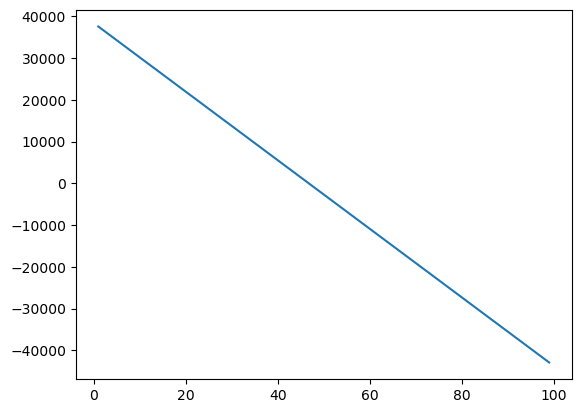

In [34]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)
yhat=lm.predict(new_input)

plt.plot(new_input, yhat)
plt.show()

### Decision Making
Remember:
When comparing models, the model with the higher R-squared value and the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models:

Dependent Variable: Price

|Model|Vars|MSE|R-Squared|
|--|--|--|--|
|Simple Linear Regression|Highway-mpg|3.16 x10^7|0.497|
|Multiple Linear Regression|Horsepower, curb-weight, engine-size, highway-mpg|1.2 x10^7|0.809|
|Polynomial Fit|Highway-mpg|2.05 x 10^7|0.674|

#### SLR vs MLR
- Comparing MSE: SLR > MLR (3.16 > 1.2) **MLR is smaller and a better fit for the data**
- Comparing R2: SLR < MLR (0.497 < 0.809) **MLR is higher and a better fit for the data**

This R-squared in combination with the MSE show that **MLR seems like the better model fit in this case compared to SLR**.

#### SLR vs Polynomial fit
- Comparing MSE: SLR > POL (3.16 > 2.05) **POL is smaller and a better fit for the data**
- Comparing R2: SLR < POL (0.497 < 0.674) **POL is higher and a better fit for the data**

This R-squared in combination with the MSE show that **Polynomial fit seems like the better model fit in this case compared to SLR**.

#### MLR vs Polynomial fit
- Comparing MSE: POL > MLR (2.05 > 1.2) **MLR is smaller and a better fit for the data**
- Comparing R2: POL < MLR (0.674 < 0.809) **MLR is higher and a better fit for the data**

This R-squared in combination with the MSE show that **MLR seems like the better model fit in this case compared to Polynomial Regression**.

## Conclusion
Comparing these three models, we conclude that **the MLR model is the best model to be able to predict price from our dataset**. 
This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.